In [5]:
import pandas as pd

# Define the structure of each data type
file_header_structure = [
    ("Record Type", str, 1),
    ("File Name", str, 22),
    ("File Number", int, 3),
    ("File Correction Flag", str, 1),
    ("As-Of Date", int, 6),
    ("Date File Generated", int, 8)
]

pool_header_structure = [
    ("Record Type", str, 1),
    ("CUSIP Number", str, 9),
    ("Pool ID", str, 6),
    ("Issue Type", str, 1),
    ("Pool Type", str, 2),
    ("Pool Issue Date", int, 8),
    ("Issuer ID", int, 4),
    ("As-Of Date", int, 6)
]

record_type_l_structure = [
    ("Record Type", str, 1),
    ("Pool ID", str, 6),
    ("Issuer ID", int, 4),
    ("Disclosure Sequence Number", int, 10),
    ("Sequence Number Suffix", int, 3),
    ("Property Type Code", int, 1),
    ("Original Principal Limit", float, 12),
    ("Current Principal Limit", float, 12),
    ("Reserved/Filler", int, 2),
    ("Payment Reason Code", int, 2),
    ("Original HECM Loan Balance (OPB)", float, 12),
    ("Current HECM Loan Balance", float, 12),
    ("Mortgage Margin", float, 5),
    ("Rate Reset Frequency", str, 1),
    ("Servicing Fee Margin", float, 4),
    ("Borrower 1 Age at Pool Issuance", int, 3),
    ("Borrower 2 Age at Pool Issuance", int, 3),
    ("MSA", int, 5),
    ("HECM Loan Original Interest Rate", float, 5),
    ("HECM Loan Current Interest Rate", float, 5),
    ("Participation UPB", float, 12),
    ("Participation Interest Rate", float, 5),
    ("Loan Servicing Fee Code", int, 1),
    ("Expected Average Mortgage Interest Rate", float, 5),
    ("Servicing Fee Set Aside Amount", float, 12),
    ("HECM Original Funding Date (CCYYMM)", int, 6),
    ("Filler", str, 2),
    ("Property Valuation Amount", float, 12),
    ("Original Term of Payments", int, 3),
    ("Property Charges Set Aside Amount", float, 12),
    ("Property Repair Set Aside Amount", float, 12),
    ("Property Valuation Effective Date (CCYYMMDD)", int, 8),
    ("Loan Origination Company", str, 30),
    ("HECM Loan Purpose Code", int, 1),
    ("HECM Loan Payment Option Code", int, 1),
    ("HECM Saver Flag", str, 1),
    ("Original Available Line of Credit Amount", float, 12),
    ("Original Draw Amount", float, 12),
    ("Mortgage Servicer", str, 10),
    ("Lifetime Floor Rate", float, 5),
    ("Remaining Available Line of Credit Amount", float, 12),
    ("Monthly Servicing Fee Amount", float, 12),
    ("Monthly Scheduled Payment Amount", float, 12),
    ("Remaining Term of Payments", int, 3),
    ("Initial Change Date (CCYYMMDD)", int, 8),
    ("Credit Line Set Aside Amount", float, 12),
    ("MIP Basis Points", int, 3),
    ("Maximum Claim Amount", float, 13),
    ("Lifetime Interest Rate Change Cap", int, 2),
    ("Reset Months", int, 2),
    ("Current Month Liquidation Flag", str, 1),
    ("Eligible Non-borrowing Spouse", str, 1),
    ("Mandatory Property Charges Set Aside", str, 1),
    ("Annual Interest Rate Change Cap", int, 2),
    ("Maximum Interest Rate", float, 5),
    ("Remaining Property Charges Set Aside", float, 13),
    ("As-Of Date (CCYYMM)", int, 6),
    ("Initial Monthly Scheduled Payment", float, 13),
    ("Initial Remaining Available Line of Credit", float, 13),
    ("Adjustment Date (CCYYMMDD)", int, 8)
]

pool_trailer_structure = [
    ("Record Type", str, 1),
    ("CUSIP Number", str, 9),
    ("Pool ID", str, 6),
    ("Issue Type", str, 1),
    ("Pool Type", str, 2),
    ("Pool Issue Date", int, 8),
    ("Issuer ID", int, 4),
    ("As-Of Date", int, 6),
    ("Loan Count for the Pool", int, 7)
]

file_trailer_structure = [
    ("Record Type", str, 1),
    ("File Name", str, 22),
    ("File Number", int, 3),
    ("Count of Pools in this File (Control Total)", int, 7),
    ("Count of Loans in this File (Control Total)", int, 9),
    ("Total Record Count (Control Total including all headers and trailers)", int, 9),
    ("As-Of Date (CCYYMM)", int, 6)
]

In [6]:
# Function to parse a line of data based on the provided structure
def parse_data(line, structure):
    parsed_data = {}
    start = 0
    for field_name, data_type, length in structure:
        end = start + length
        field_data = line[start:end].strip()
        if not field_data:
            parsed_data[field_name] = None  # Set None for empty values
        else:
            try:
                if data_type == int:
                    field_data = int(field_data)
                elif data_type == float:
                    field_data = float(field_data)
                parsed_data[field_name] = field_data
            except (ValueError, TypeError):
                parsed_data[field_name] = None  # Set None for invalid values
        start = end
    return parsed_data

In [7]:
# Read the file and parse the data into respective data types
data = {}
max_records = 500000  # Specify the maximum number of records to read for each DataFrame

with open("GNMA_HMB_LL_MON_rl2_202305_001.txt", "r") as file:
    for line in file:
        record_type = line[0]
        if record_type == "H":
            data_type_structure = file_header_structure
            dataframe_name = "file_header_df"
        elif record_type == "P":
            data_type_structure = pool_header_structure
            dataframe_name = "pool_header_df"
        elif record_type == "L":
            data_type_structure = record_type_l_structure
            dataframe_name = "record_type_l_df"
        elif record_type == "T":
            data_type_structure = pool_trailer_structure
            dataframe_name = "pool_trailer_df"
        elif record_type == "Z":
            data_type_structure = file_trailer_structure
            dataframe_name = "file_trailer_df"
        else:
            # Handle other record types if needed
            continue
        parsed_line = parse_data(line, data_type_structure)
        if dataframe_name not in data:
            data[dataframe_name] = []
        data[dataframe_name].append(parsed_line)

        # Break the loop if the specified number of records has been reached for the current DataFrame
        if len(data[dataframe_name]) >= max_records:
            break


In [8]:
# Create DataFrames for each data type
file_header_df = pd.DataFrame(data.get("file_header_df", []))
pool_header_df = pd.DataFrame(data.get("pool_header_df", []))
record_type_l_df = pd.DataFrame(data.get("record_type_l_df", []))
pool_trailer_df = pd.DataFrame(data.get("pool_trailer_df", []))
file_trailer_df = pd.DataFrame(data.get("file_trailer_df", []))


In [9]:
pd.options.display.max_columns = None

file_header_df

,Record Type,File Name,File Number,File Correction Flag,As-Of Date,Date File Generated
0,H,GNMA_HMB_LL_MON_202305,1,N,202305,20230608


In [10]:
pool_header_df

,Record Type,CUSIP Number,Pool ID,Issue Type,Pool Type,Pool Issue Date,Issuer ID,As-Of Date
0,P,36208AZY0,891562,H,RM,20080901,9281,202305
1,P,36208AZZ7,891563,H,ML,20080901,9281,202305
2,P,36208AZ61,891564,H,RM,20081101,9281,202305
3,P,36208A2R1,891565,H,RM,20090201,9281,202305
4,P,36208A2Y6,891566,H,RM,20090501,9281,202305
...,...,...,...,...,...,...,...,...
222,P,3620E0GY6,892988,H,ML,20101201,9281,202305
223,P,3620E0GZ3,892989,H,ML,20101201,9281,202305
224,P,3620E0G26,892990,H,RM,20101201,9281,202305
225,P,3620E0CZ7,892991,H,ML,20100601,4015,202305


In [11]:
record_type_l_df

,Record Type,Pool ID,Issuer ID,Disclosure Sequence Number,Sequence Number Suffix,Property Type Code,Original Principal Limit,Current Principal Limit,Reserved/Filler,Payment Reason Code,Original HECM Loan Balance (OPB),Current HECM Loan Balance,Mortgage Margin,Rate Reset Frequency,Servicing Fee Margin,Borrower 1 Age at Pool Issuance,Borrower 2 Age at Pool Issuance,MSA,HECM Loan Original Interest Rate,HECM Loan Current Interest Rate,Participation UPB,Participation Interest Rate,Loan Servicing Fee Code,Expected Average Mortgage Interest Rate,Servicing Fee Set Aside Amount,HECM Original Funding Date (CCYYMM),Filler,Property Valuation Amount,Original Term of Payments,Property Charges Set Aside Amount,Property Repair Set Aside Amount,Property Valuation Effective Date (CCYYMMDD),Loan Origination Company,HECM Loan Purpose Code,HECM Loan Payment Option Code,HECM Saver Flag,Original Available Line of Credit Amount,Original Draw Amount,Mortgage Servicer,Lifetime Floor Rate,Remaining Available Line of Credit Amount,Monthly Servicing Fee Amount,Monthly Scheduled Payment Amount,Remaining Term of Payments,Initial Change Date (CCYYMMDD),Credit Line Set Aside Amount,MIP Basis Points,Maximum Claim Amount,Lifetime Interest Rate Change Cap,Reset Months,Current Month Liquidation Flag,Eligible Non-borrowing Spouse,Mandatory Property Charges Set Aside,Annual Interest Rate Change Cap,Maximum Interest Rate,Remaining Property Charges Set Aside,As-Of Date (CCYYMM),Initial Monthly Scheduled Payment,Initial Remaining Available Line of Credit,Adjustment Date (CCYYMMDD)
0,L,891562,9281,1000001764,1,1,15374385.0,23646329.0,None,NaN,14754665.0,23470986.0,1000.0,M,200.0,65,65.0,None,3330.0,5460.0,20163719.0,5260.0,1,5530.0,619720.0,200703,None,25000000.0,0.0,0.0,0.0,20070315.0,FIRST NATIONS HOME FINANCE COR,1.0,3,N,0.0,14754665.0,6443809990,1000.0,NaN,3500.0,NaN,NaN,20070601,0.0,50,23985000.0,None,1,N,N,None,None,15920.0,0.0,202305,NaN,NaN,20230601
1,L,891562,9281,1000001767,1,4,14822730.0,22676918.0,None,NaN,14290731.0,22571482.0,1000.0,M,200.0,68,64.0,None,3330.0,5460.0,19773792.0,5260.0,1,5580.0,531999.0,200704,None,24000000.0,0.0,0.0,0.0,20070330.0,SUN VALLEY FINANCIAL OF UTAH,1.0,3,N,0.0,14290731.0,6443809990,1000.0,NaN,3000.0,NaN,NaN,20070601,0.0,50,23985000.0,None,1,N,N,None,None,15930.0,0.0,202305,NaN,NaN,20230601
2,L,891562,9281,1000001769,1,4,14812200.0,22660809.0,None,NaN,10541990.0,22368771.0,1000.0,M,200.0,64,NaN,None,3330.0,5460.0,14590640.0,5260.0,1,5550.0,444933.0,200704,None,23400000.0,0.0,0.0,0.0,20070330.0,HOMESTAR MORTGAGE INC.,1.0,3,N,3825277.0,10541990.0,6443809990,1000.0,NaN,2500.0,NaN,NaN,20070601,0.0,50,23400000.0,None,1,N,N,None,None,15930.0,0.0,202305,NaN,NaN,20230601
3,L,891562,9281,1000001772,1,1,11169000.0,17001885.0,None,5.0,5815007.0,0.0,1000.0,M,200.0,70,67.0,None,3330.0,5460.0,0.0,5260.0,1,5530.0,609455.0,200704,None,17000000.0,0.0,762823.0,0.0,20070409.0,FIRST NATIONS HOME FINANCE COR,1.0,3,N,3942618.0,5815007.0,6443809990,1000.0,NaN,3500.0,NaN,NaN,20070701,0.0,50,17000000.0,None,1,Y,N,None,None,15900.0,0.0,202305,NaN,NaN,20230601
4,L,891562,9281,1000001794,1,1,14332650.0,22060925.0,None,5.0,10968630.0,0.0,1000.0,M,200.0,70,67.0,None,3330.0,5460.0,0.0,5260.0,1,5660.0,600472.0,200702,None,53000000.0,0.0,0.0,0.0,20070223.0,SUN VALLEY FINANCIAL OF UTAH,1.0,3,N,2920910.0,10968630.0,6443809990,1000.0,NaN,3500.0,NaN,NaN,20070501,0.0,50,22325000.0,None,1,Y,N,N,None,16070.0,0.0,202305,NaN,NaN,20230601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29540,L,892992,4015,1000023899,1,1,6637220.0,9935838.0,None,NaN,6637220.0,9695677.0,1750.0,M,60.0,62,65.0,None,2099.0,6581.0,5223030.0,6521.0,2,6730.0,563427.0,201005,None,37500000.0,0.0,0.0,0.0,20100519.0,4157,1.0,3,N,30162059.0,6637220.0,1142500001,1750.0,0.0,3500.0,NaN,NaN,20100801,0.0,50,11810

In [12]:
pool_trailer_df

,Record Type,CUSIP Number,Pool ID,Issue Type,Pool Type,Pool Issue Date,Issuer ID,As-Of Date,Loan Count for the Pool
0,T,36208AZY0,891562,H,RM,20080901,9281,202305,73
1,T,36208AZZ7,891563,H,ML,20080901,9281,202305,19
2,T,36208AZ61,891564,H,RM,20081101,9281,202305,73
3,T,36208A2R1,891565,H,RM,20090201,9281,202305,69
4,T,36208A2Y6,891566,H,RM,20090501,9281,202305,66
...,...,...,...,...,...,...,...,...,...
221,T,3620E0GX8,892987,H,ML,20101201,9281,202305,31
222,T,3620E0GY6,892988,H,ML,20101201,9281,202305,60
223,T,3620E0GZ3,892989,H,ML,20101201,9281,202305,78
224,T,3620E0G26,892990,H,RM,20101201,9281,202305,343


In [13]:
file_trailer_df

""


In [11]:
record_type_l_df.to_excel('loans_output.xlsx', index=False)

In [71]:
pool_trailer_df.to_csv('loans_output.csv', index=False)

#Then manually replace spaces with underscore characters in attribute names before proceeding

In [15]:
import csv, sqlite3

con = sqlite3.connect(":memory:") # change to 'sqlite:///your_filename.db'
cur = con.cursor()
cur.execute("CREATE TABLE loan_pool (CUSIP_Number, Pool_Issue_Date, Pool_Type, Loan_Count);") # use your column names here

with open('loans_output.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['CUSIP_Number'], i['Pool_Issue_Date'], i['Pool_Type'], i['Loan_Count']) for i in dr]

cur.executemany("INSERT INTO loan_pool (CUSIP_Number, Pool_Issue_Date, Pool_Type, Loan_Count) VALUES (?, ?, ?, ?);", to_db)


In [16]:
#try querying the database
cur.execute("SELECT AVG(Loan_Count) FROM loan_pool")
#storing the result of the fetchall function in a variable called median_prices
average_pool_size = cur.fetchall()
print(average_pool_size)

[(130.49557522123894,)]


In [17]:
#try querying the database again
cur.execute("SELECT Pool_Type, AVG(Loan_Count) FROM loan_pool GROUP BY Pool_Type ORDER BY AVG(Loan_Count) DESC")
#storing the result of the fetchall function in a variable called median_prices
average_pool_size = cur.fetchall()
print(average_pool_size)

[('RM', 209.73584905660377), ('ML', 106.21965317919076)]


Issue Date   Avg Loan Count
----------   ---------------
20080401     247.0
20100701     229.75
20101101     227.4
20100901     208.625
20101201     206.08333333333334
20081001     203.66666666666666
20080601     187.0
20130401     185.0
20090701     185.0
20100401     165.68421052631578
20100501     161.78571428571428
20100801     152.75
20090101     144.66666666666666
20101001     142.91666666666666
20100101     135.92307692307693
20090801     124.0
20081101     121.0
20100301     114.16666666666667
20080801     110.5
20081201     110.0
20100601     105.42857142857143
20080701     103.0
20090601     101.0
20080901     95.5
20091201     93.05263157894737
20100201     75.6
20090201     69.0
20110201     64.0
20091101     46.57142857142857
20090901     31.0
20090501     27.0
20091001     19.0
20120801     14.666666666666666
20090401     3.5
20090301     3.0


/var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/ipykernel_35662/622016903.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)


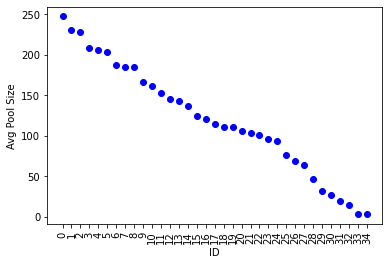

In [62]:
import matplotlib.pyplot as plt

#try querying the database again
cur.execute("SELECT Pool_Issue_Date, AVG(Loan_Count) FROM loan_pool GROUP BY Pool_Issue_Date ORDER BY AVG(Loan_Count) DESC")
#storing the result of the fetchall function in a variable called median_prices
average_pool_size = cur.fetchall()

print("Issue Date", " ", "Avg Loan Count")
print("----------   ---------------")
for r in average_pool_size:
    print(r[0], "   ", r[1])
    
ax = plt.gca()

for r in average_pool_size:
    plt.plot(r[0], float(r[1]), 'bo')    

plt.draw()

ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.xlabel("ID")
plt.ylabel("Avg Pool Size")

plt.show()

/var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/ipykernel_35662/1011039306.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)


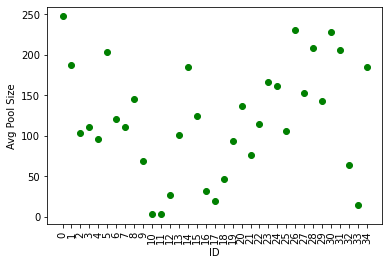

In [63]:
#try querying the database again
cur.execute("SELECT Pool_Issue_Date, AVG(Loan_Count) FROM loan_pool GROUP BY Pool_Issue_Date ORDER BY Pool_Issue_Date")
#storing the result of the fetchall function in a variable called median_prices
average_pool_size = cur.fetchall()

ax = plt.gca()

for r in average_pool_size:
    plt.plot(r[0], float(r[1]), 'go')    

plt.draw()

ax.set_xticklabels(ax.get_xticks(), rotation = 90)

plt.xlabel("ID")
plt.ylabel("Avg Pool Size")

plt.show()